/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:667: UserWarning: `model.compiled_loss()` is deprecated. Instead, use `model.compute_loss(x, y, y_pred, sample_weight, training)`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


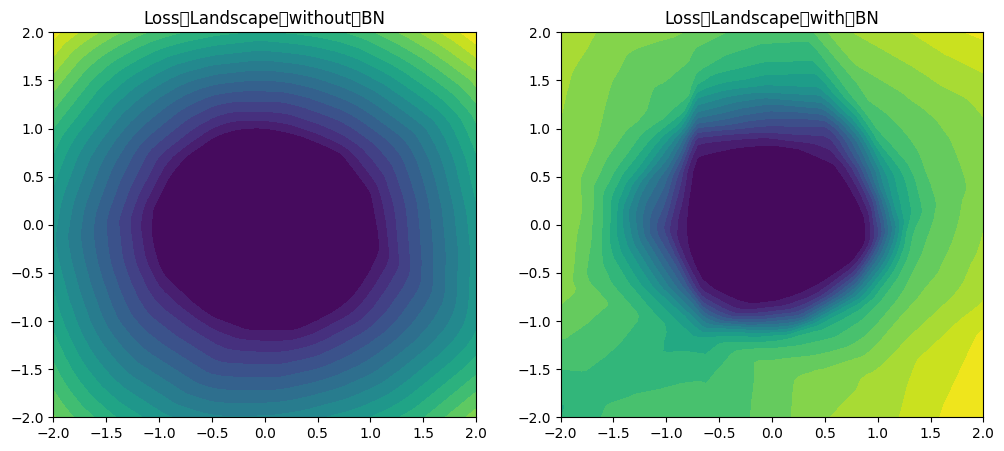

In [5]:
'''Design	a	simple	neural	network	with	a	Batch	Normalization	layer	in	the	hidden
   layers,	and	another	without	Batch	Normalization	in	the	hidden	layers.	Then,	plot
   a	contour	plot	to	visualize	the	loss	landscape	during	training.'''


 import	numpy	as	np
 import	tensorflow	as	tf
 import	matplotlib.pyplot	as	plt
 from	tensorflow.keras.models	import	Sequential
 from	tensorflow.keras.layers	import	Dense,	BatchNormalization
 from	tensorflow.keras.optimizers	import	Adam
 #	Generate	synthetic	data
 np.random.seed(42)
 x_train	=	np.random.randn(1000,	2).astype(np.float32)
 y_train	=	(x_train[:,	0]	**	2	+	x_train[:,	1]	**	2	<	1).astype(np.float32)
 #	Model	without	Batch	Normalization
 def	create_model_without_bn():
    model	=	Sequential([
    Dense(64,	activation='relu',	input_shape=(2,)),
    Dense(64,	activation='relu'),
    Dense(1,	activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01),	loss='binary_crossentropy')
    return	model
 #	Model	with	Batch	Normalization
 def	create_model_with_bn():
    model	=	Sequential([
    Dense(64,	activation='relu',	input_shape=(2,)),
    BatchNormalization(),
    Dense(64,	activation='relu'),
    BatchNormalization(),
    Dense(1,	activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01),	loss='binary_crossentropy')
    return	model
 #	Create	and	train	models
 model_no_bn	=	create_model_without_bn()
 model_bn	=	create_model_with_bn()
 model_no_bn.fit(x_train,	y_train,	epochs=20,	verbose=0)
 model_bn.fit(x_train,	y_train,	epochs=20,	verbose=0)
 #	Generate	grid	for	contour	plot
 x_vals	=	np.linspace(-2,	2,	100)
 y_vals	=	np.linspace(-2,	2,	100)
 X,	Y	=	np.meshgrid(x_vals,	y_vals)
 Z_no_bn	=	np.zeros_like(X,	dtype=np.float32)
 Z_bn	=	np.zeros_like(X,	dtype=np.float32)
 def	compute_loss(model,	x):
    y_true	=	tf.constant([[1.0]],	dtype=tf.float32)
    y_pred	=	model(tf.convert_to_tensor(x,	dtype=tf.float32))
    return	model.compiled_loss(y_true,	y_pred).numpy()

 #	Compute	loss	for	each	point	in	the	grid
 for i in	range(X.shape[0]):
     for	j	in	range(X.shape[1]):
          inp	=	np.array([[X[i,	j],	Y[i,	j]]],	dtype=np.float32)
          Z_no_bn[i,	j]	=	compute_loss(model_no_bn,	inp)
          Z_bn[i,	j]	=	compute_loss(model_bn,	inp)

 #	Plot	loss	landscapes
 fig,	ax	=	plt.subplots(1,	2,	figsize=(12,	5))
 ax[0].contourf(X,	Y,	Z_no_bn,	levels=20,	cmap='viridis')
 ax[0].set_title("Loss	Landscape	without	BN")
 ax[1].contourf(X,	Y,	Z_bn,	levels=20,	cmap='viridis')
 ax[1].set_title("Loss	Landscape	with	BN")
 plt.show()